In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Meriem\Desktop\AI\titanic-passengers.csv', sep=";")

print(df.head().to_string(),'\n \n') 
df.info()

   PassengerId Survived  Pclass                                         Name     Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked
0          343       No       2                   Collander, Mr. Erik Gustaf    male  28.0      0      0      248740  13.0000    NaN        S
1           76       No       3                      Moen, Mr. Sigurd Hansen    male  25.0      0      0      348123   7.6500  F G73        S
2          641       No       3                       Jensen, Mr. Hans Peder    male  20.0      0      0      350050   7.8542    NaN        S
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0      4      349909  21.0750    NaN        S
4          672       No       1                       Davidson, Mr. Thornton    male  31.0      1      0  F.C. 12750  52.0000    B71        S 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype

Logistic Regression Data Preparation

In [3]:
df["Survived"]=df["Survived"].map({"Yes": 1, "No": 0})   #convert admitted variable into numerical
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
df["Sex"]=df["Sex"].map({"male": 1, "female": 0})   #convert admitted variable into numerical
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [21]:
x = df[['Age', 'Sex','Pclass']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.81


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

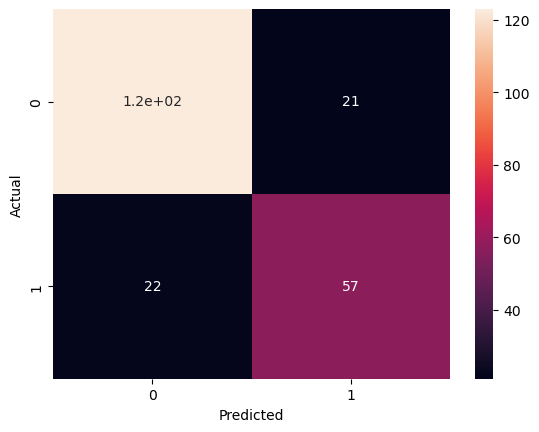

In [13]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for 
binary classification problems. It is a probability curve that plots the TPR 
against FPR at various threshold values and essentially separates the 
‘signal’ from the ‘noise’.
The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

roc_auc_score for DecisionTree:  0.7796237693389593
roc_auc_score for Logistic Regression:  0.8415963431786216


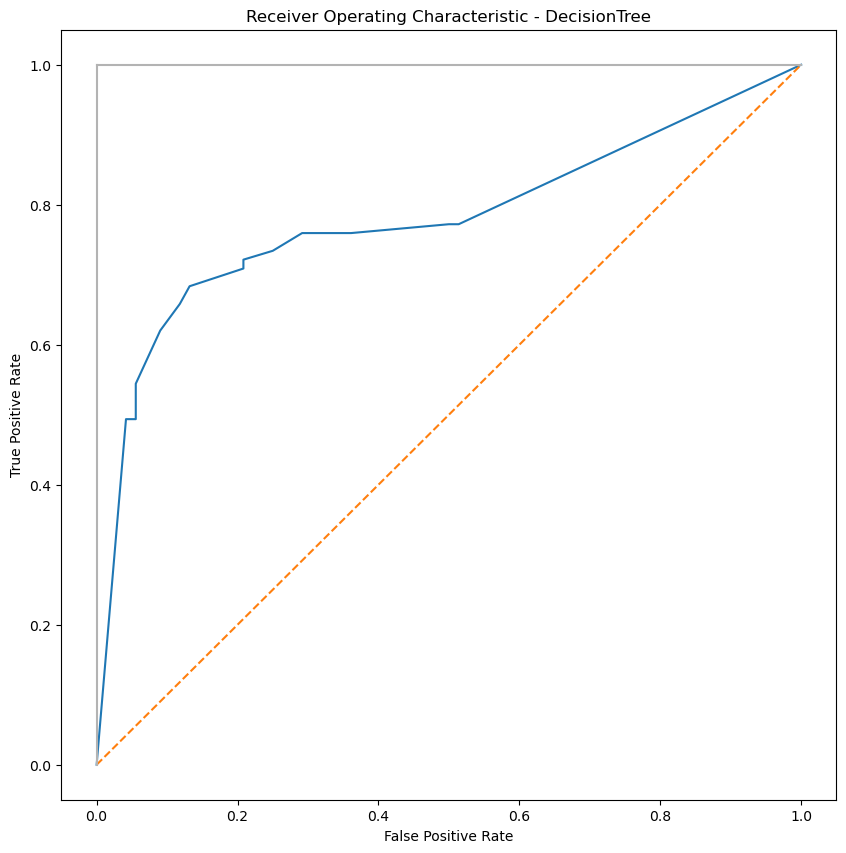

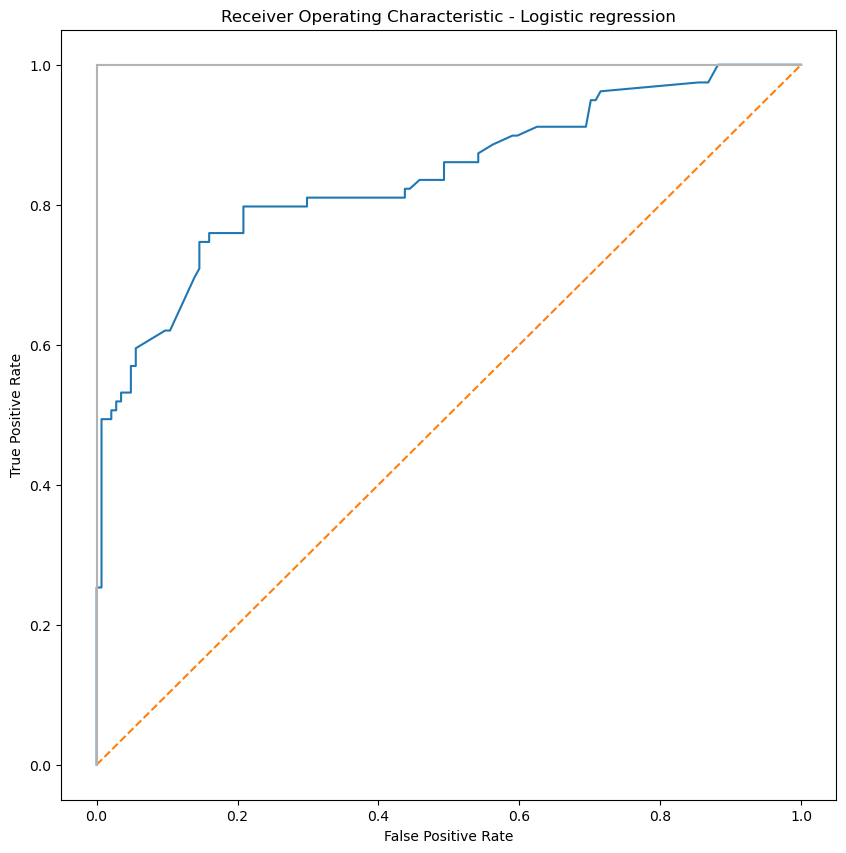

In [30]:
#Spliting the data and Training the model
clf_tree = DecisionTreeClassifier();
clf_reg = LogisticRegression();
clf_tree.fit(x_train, y_train); 
clf_reg.fit(x_train, y_train);
#Using the models on test dataset
y_score1 = clf_tree.predict_proba(x_test)[:,1]
y_score2 = clf_reg.predict_proba(x_test)[:,1]
#Creating False and True Positive Rates and printing Scores
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))
#Ploting ROC Curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()